# CS 7324-400B: Lab Four - Multi-Layer Perceptron
#### Fall 2023
#### Author: Davis Vercher (49377022)

##### References & Citations
- **Download Link:**
    - https://www.dropbox.com/s/bf7i7qjftk7cmzq/acs2017_census_tract_data.csv?dl=0
- **Source:** 
    - United States Census Bureau

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy.special import expit
import sys
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from IPython.display import display, clear_output

%matplotlib inline

## 1. Load, Split, and Balance

### 1a. Loading into pandas df, removing missing data, encoding strings as integers

In [2]:
df = pd.read_csv('acs2017_census_tract_data.csv')
print(len(df)); df.head()

74001


,TractId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001020100,Alabama,Autauga County,1845,899,946,2.4,86.3,5.2,0.0,...,0.5,0.0,2.1,24.5,881,74.2,21.2,4.5,0.0,4.6
1,1001020200,Alabama,Autauga County,2172,1167,1005,1.1,41.6,54.5,0.0,...,0.0,0.5,0.0,22.2,852,75.9,15.0,9.0,0.0,3.4
2,1001020300,Alabama,Autauga County,3385,1533,1852,8.0,61.4,26.5,0.6,...,1.0,0.8,1.5,23.1,1482,73.3,21.1,4.8,0.7,4.7
3,1001020400,Alabama,Autauga County,4267,2001,2266,9.6,80.3,7.1,0.5,...,1.5,2.9,2.1,25.9,1849,75.8,19.7,4.5,0.0,6.1
4,1001020500,Alabama,Autauga County,9965,5054,4911,0.9,77.5,16.4,0.0,...,0.8,0.3,0.7,21.0,4787,71.4,24.1,4.5,0.0,2.3


In [3]:
print(df.dtypes)

TractId               int64
State                object
County               object
TotalPop              int64
Men                   int64
Women                 int64
Hispanic            float64
White               float64
Black               float64
Native              float64
Asian               float64
Pacific             float64
VotingAgeCitizen      int64
Income              float64
IncomeErr           float64
IncomePerCap        float64
IncomePerCapErr     float64
Poverty             float64
ChildPoverty        float64
Professional        float64
Service             float64
Office              float64
Construction        float64
Production          float64
Drive               float64
Carpool             float64
Transit             float64
Walk                float64
OtherTransp         float64
WorkAtHome          float64
MeanCommute         float64
Employed              int64
PrivateWork         float64
PublicWork          float64
SelfEmployed        float64
FamilyWork          

In [4]:
print(df.duplicated().sum())

0


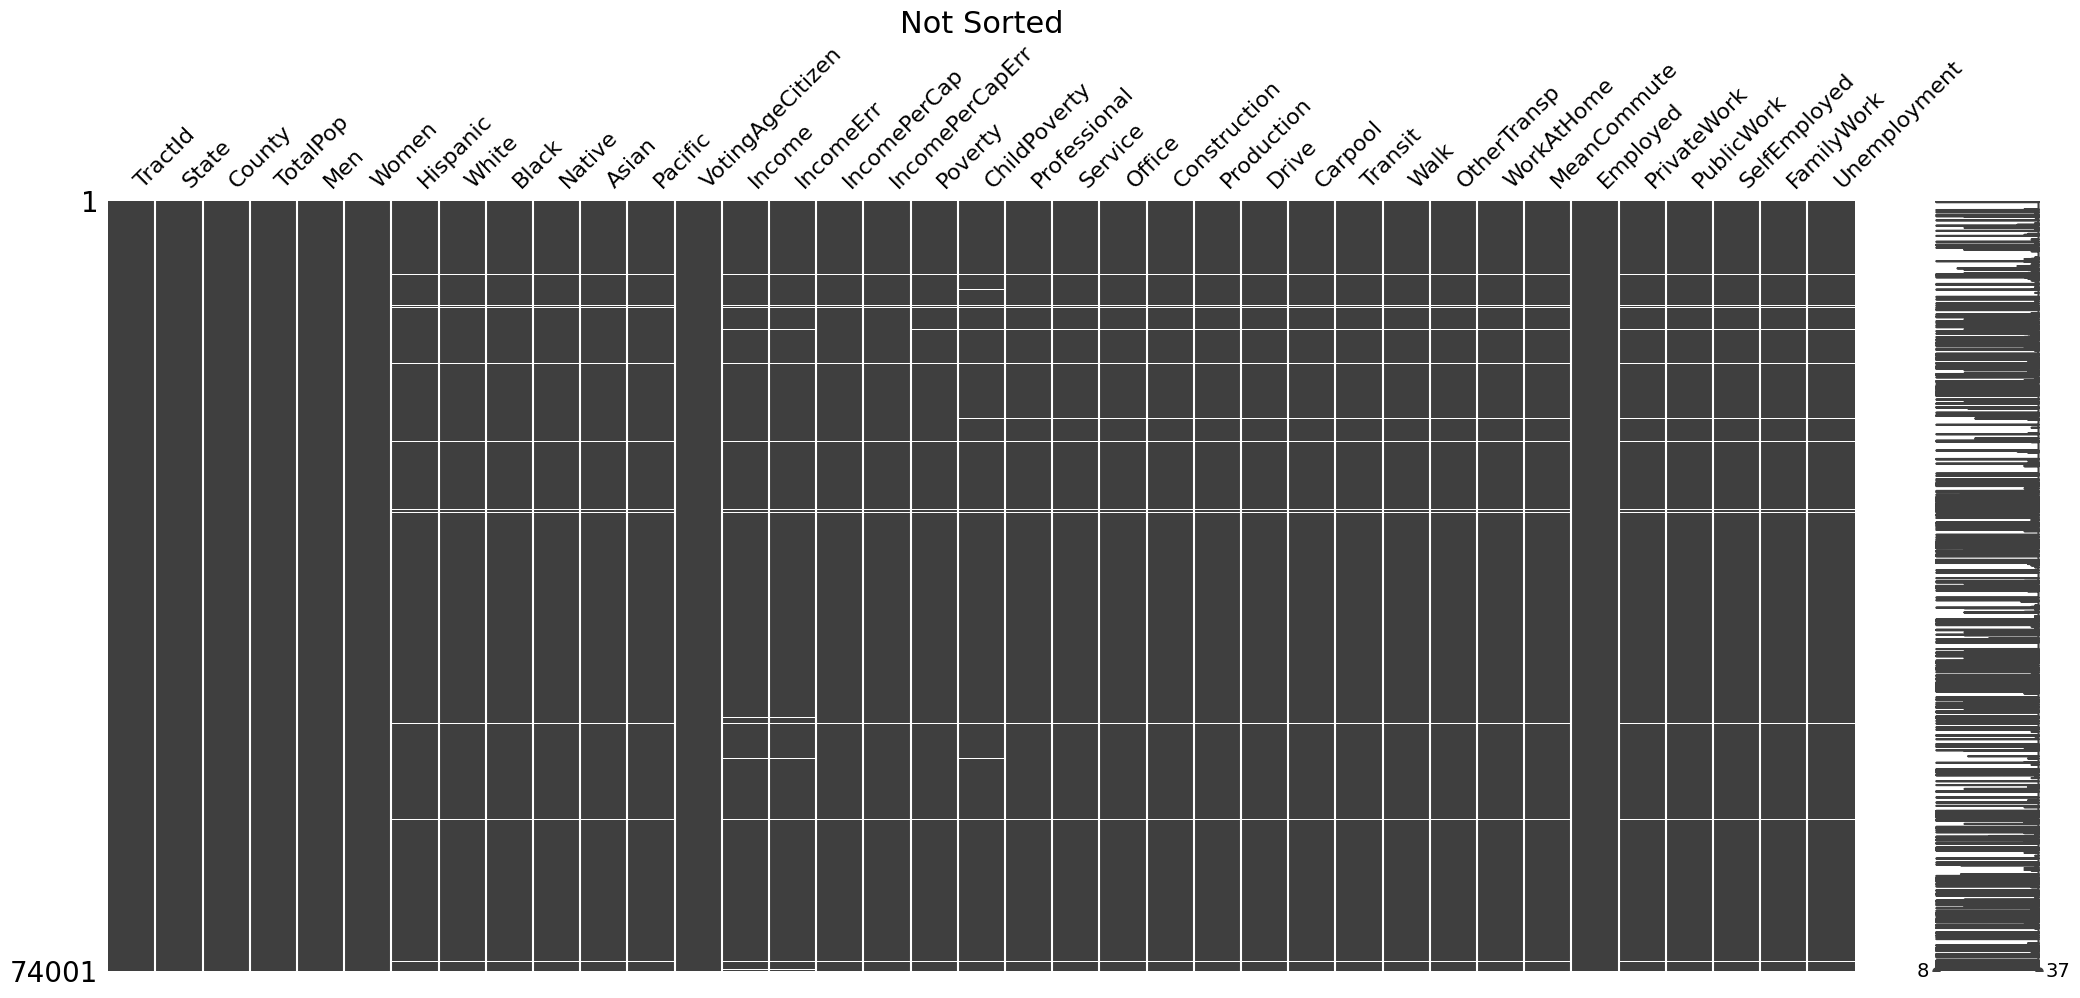

In [5]:
import missingno as mn
import matplotlib.pyplot as plt
%matplotlib inline

mn.matrix(df)
plt.title("Not Sorted", fontsize=22)
plt.show()

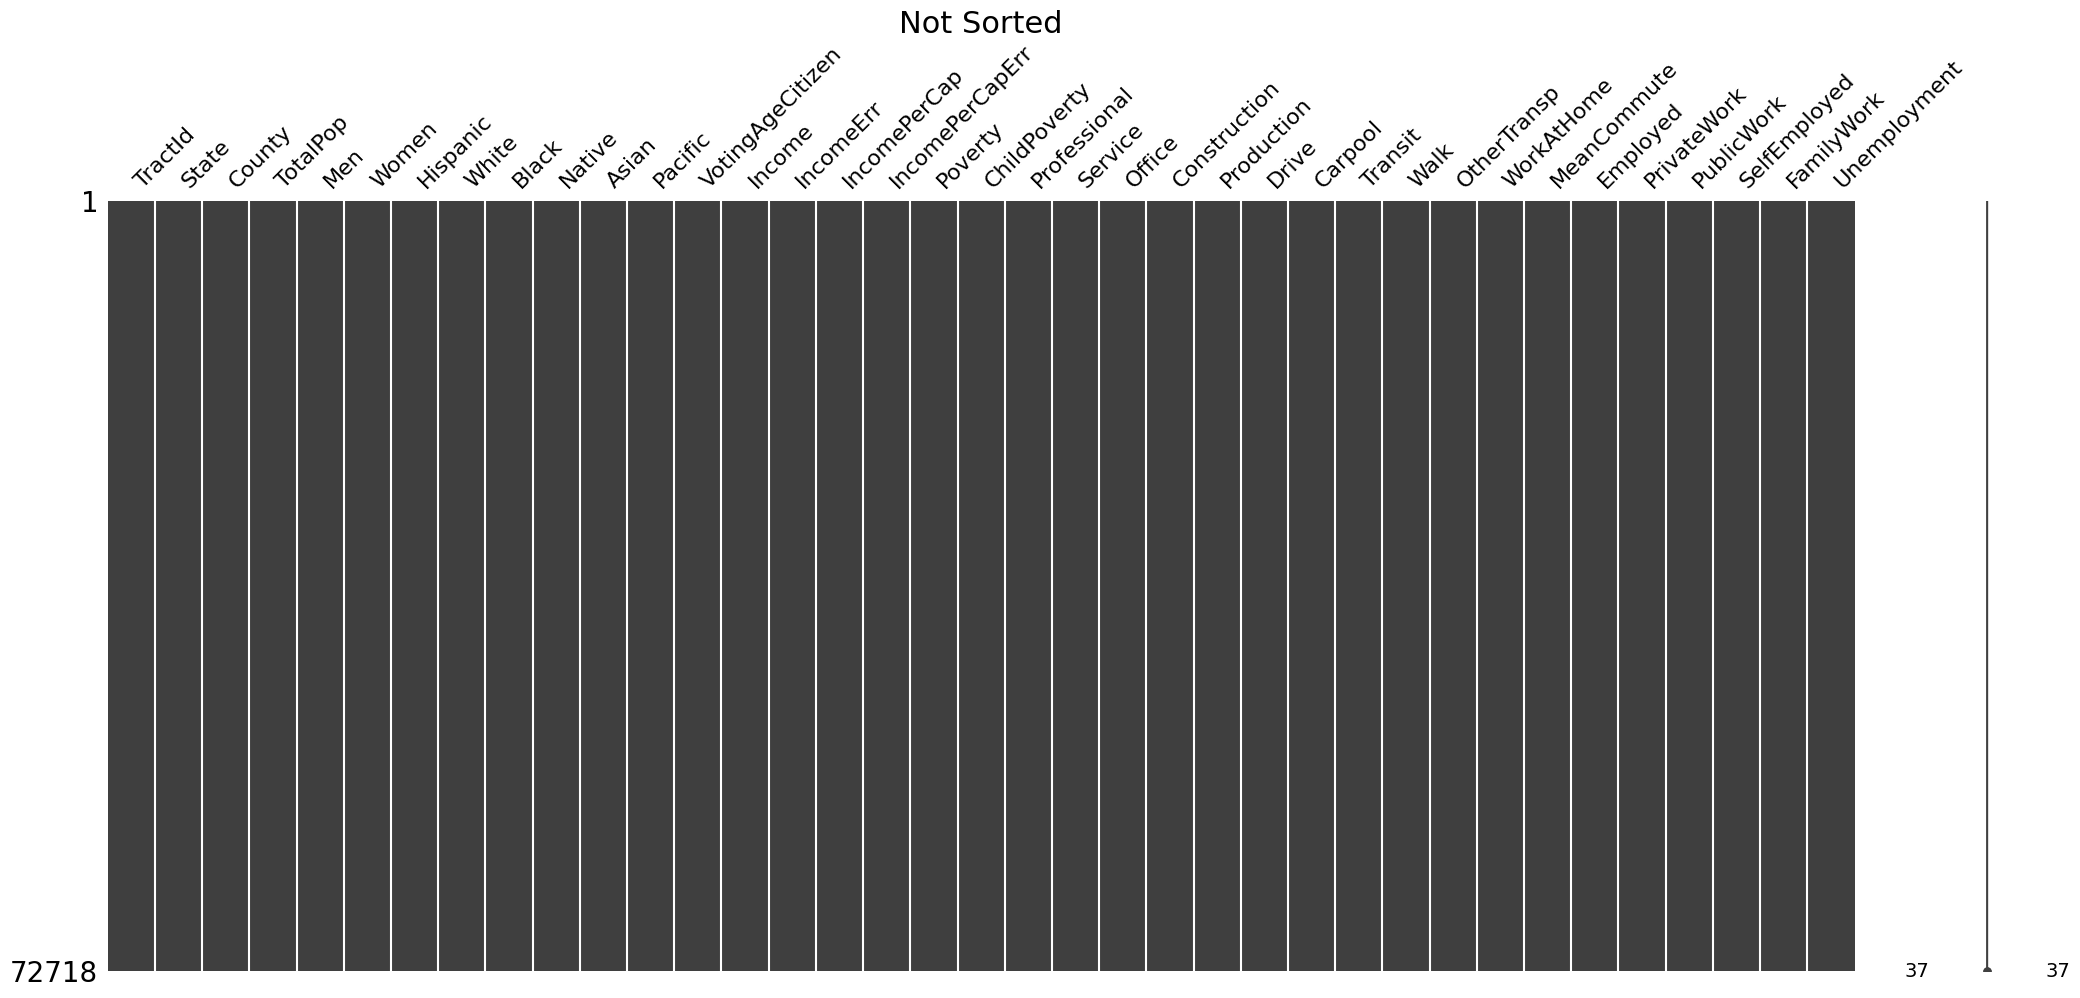

In [6]:
df.dropna(inplace=True)

mn.matrix(df)
plt.title("Not Sorted", fontsize=22)
plt.show()

In [7]:
df.head()

,TractId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001020100,Alabama,Autauga County,1845,899,946,2.4,86.3,5.2,0.0,...,0.5,0.0,2.1,24.5,881,74.2,21.2,4.5,0.0,4.6
1,1001020200,Alabama,Autauga County,2172,1167,1005,1.1,41.6,54.5,0.0,...,0.0,0.5,0.0,22.2,852,75.9,15.0,9.0,0.0,3.4
2,1001020300,Alabama,Autauga County,3385,1533,1852,8.0,61.4,26.5,0.6,...,1.0,0.8,1.5,23.1,1482,73.3,21.1,4.8,0.7,4.7
3,1001020400,Alabama,Autauga County,4267,2001,2266,9.6,80.3,7.1,0.5,...,1.5,2.9,2.1,25.9,1849,75.8,19.7,4.5,0.0,6.1
4,1001020500,Alabama,Autauga County,9965,5054,4911,0.9,77.5,16.4,0.0,...,0.8,0.3,0.7,21.0,4787,71.4,24.1,4.5,0.0,2.3


In [8]:
df.head(100)

,TractId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001020100,Alabama,Autauga County,1845,899,946,2.4,86.3,5.2,0.0,...,0.5,0.0,2.1,24.5,881,74.2,21.2,4.5,0.0,4.6
1,1001020200,Alabama,Autauga County,2172,1167,1005,1.1,41.6,54.5,0.0,...,0.0,0.5,0.0,22.2,852,75.9,15.0,9.0,0.0,3.4
2,1001020300,Alabama,Autauga County,3385,1533,1852,8.0,61.4,26.5,0.6,...,1.0,0.8,1.5,23.1,1482,73.3,21.1,4.8,0.7,4.7
3,1001020400,Alabama,Autauga County,4267,2001,2266,9.6,80.3,7.1,0.5,...,1.5,2.9,2.1,25.9,1849,75.8,19.7,4.5,0.0,6.1
4,1001020500,Alabama,Autauga County,9965,5054,4911,0.9,77.5,16.4,0.0,...,0.8,0.3,0.7,21.0,4787,71.4,24.1,4.5,0.0,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1015002000,Alabama,Calhoun County,6962,3457,3505,1.3,92.1,3.5,0.4,...,0.5,3.3,2.4,30.5,3002,79.6,16.1,4.3,0.0,2.5
97,1015002101,Alabama,Calhoun County,3621,1810,1811,0.9,63.4,33.9,0.0,...,11.4,2.3,7.0,18.7,1515,85.6,9.7,4.4,0.3,8.7
98,1015002102,Alabama,Calhoun County,3208,1486,1722,1.1,81.9,11.4,0.0,...,1.1,0.8,2.7,23.7,1612,70.4,25.8,3.8,0.0,9.8
99,1015002103,Alabama,Calhoun County,7025,3353,3672,4.2,71.8,20.4,0.2,...,0.0,0.3,3.9,23.0,2726,72.4,24.5,2.6,0.5,15.8


In [9]:
df['State-County'] = df['State'] + '-' + df['County']
labelencoder = LabelEncoder()
df['State-County_Encoded'] = labelencoder.fit_transform(df['State-County'])
state_county_mappings = {label: idx for idx, label in enumerate(labelencoder.classes_)}

In [10]:
print(len(state_county_mappings))

3219


In [11]:
state_county_mappings["Texas-Dallas County"]

2656

In [12]:
df.head()

,TractId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,State-County,State-County_Encoded
0,1001020100,Alabama,Autauga County,1845,899,946,2.4,86.3,5.2,0.0,...,2.1,24.5,881,74.2,21.2,4.5,0.0,4.6,Alabama-Autauga County,0
1,1001020200,Alabama,Autauga County,2172,1167,1005,1.1,41.6,54.5,0.0,...,0.0,22.2,852,75.9,15.0,9.0,0.0,3.4,Alabama-Autauga County,0
2,1001020300,Alabama,Autauga County,3385,1533,1852,8.0,61.4,26.5,0.6,...,1.5,23.1,1482,73.3,21.1,4.8,0.7,4.7,Alabama-Autauga County,0
3,1001020400,Alabama,Autauga County,4267,2001,2266,9.6,80.3,7.1,0.5,...,2.1,25.9,1849,75.8,19.7,4.5,0.0,6.1,Alabama-Autauga County,0
4,1001020500,Alabama,Autauga County,9965,5054,4911,0.9,77.5,16.4,0.0,...,0.7,21.0,4787,71.4,24.1,4.5,0.0,2.3,Alabama-Autauga County,0


In [13]:
df = df.drop(['State', 'County', 'State-County'], axis=1)
df.head()

,TractId,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,...,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,State-County_Encoded
0,1001020100,1845,899,946,2.4,86.3,5.2,0.0,1.2,0.0,...,0.0,2.1,24.5,881,74.2,21.2,4.5,0.0,4.6,0
1,1001020200,2172,1167,1005,1.1,41.6,54.5,0.0,1.0,0.0,...,0.5,0.0,22.2,852,75.9,15.0,9.0,0.0,3.4,0
2,1001020300,3385,1533,1852,8.0,61.4,26.5,0.6,0.7,0.4,...,0.8,1.5,23.1,1482,73.3,21.1,4.8,0.7,4.7,0
3,1001020400,4267,2001,2266,9.6,80.3,7.1,0.5,0.2,0.0,...,2.9,2.1,25.9,1849,75.8,19.7,4.5,0.0,6.1,0
4,1001020500,9965,5054,4911,0.9,77.5,16.4,0.0,3.1,0.0,...,0.3,0.7,21.0,4787,71.4,24.1,4.5,0.0,2.3,0


In [14]:
cols = list(df.columns)

col_to_move = cols.pop()
cols.insert(1, col_to_move)

df = df[cols]
df.head()

,TractId,State-County_Encoded,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001020100,0,1845,899,946,2.4,86.3,5.2,0.0,1.2,...,0.5,0.0,2.1,24.5,881,74.2,21.2,4.5,0.0,4.6
1,1001020200,0,2172,1167,1005,1.1,41.6,54.5,0.0,1.0,...,0.0,0.5,0.0,22.2,852,75.9,15.0,9.0,0.0,3.4
2,1001020300,0,3385,1533,1852,8.0,61.4,26.5,0.6,0.7,...,1.0,0.8,1.5,23.1,1482,73.3,21.1,4.8,0.7,4.7
3,1001020400,0,4267,2001,2266,9.6,80.3,7.1,0.5,0.2,...,1.5,2.9,2.1,25.9,1849,75.8,19.7,4.5,0.0,6.1
4,1001020500,0,9965,5054,4911,0.9,77.5,16.4,0.0,3.1,...,0.8,0.3,0.7,21.0,4787,71.4,24.1,4.5,0.0,2.3


I need to keep the 'County' column because our goal is to predict the child poverty rate by county. I have merged the 'State' and 'County' columns and label encoded them so each state-county possibility has a unique number value. The number and state-county mappings are saved in the 'state_county_mappings' dictionary.

### 1b. Split and Balance

In [15]:
quantiles = df['ChildPoverty'].quantile([0.25, 0.5, 0.75])

df['ChildPovertyQuantile'] = 0
df.loc[df['ChildPoverty'] > quantiles.iloc[0], 'ChildPovertyQuantile'] = 1
df.loc[df['ChildPoverty'] > quantiles.iloc[1], 'ChildPovertyQuantile'] = 2
df.loc[df['ChildPoverty'] > quantiles.iloc[2], 'ChildPovertyQuantile'] = 3

df.head()

,TractId,State-County_Encoded,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,...,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,ChildPovertyQuantile
0,1001020100,0,1845,899,946,2.4,86.3,5.2,0.0,1.2,...,0.0,2.1,24.5,881,74.2,21.2,4.5,0.0,4.6,2
1,1001020200,0,2172,1167,1005,1.1,41.6,54.5,0.0,1.0,...,0.5,0.0,22.2,852,75.9,15.0,9.0,0.0,3.4,3
2,1001020300,0,3385,1533,1852,8.0,61.4,26.5,0.6,0.7,...,0.8,1.5,23.1,1482,73.3,21.1,4.8,0.7,4.7,2
3,1001020400,0,4267,2001,2266,9.6,80.3,7.1,0.5,0.2,...,2.9,2.1,25.9,1849,75.8,19.7,4.5,0.0,6.1,0
4,1001020500,0,9965,5054,4911,0.9,77.5,16.4,0.0,3.1,...,0.3,0.7,21.0,4787,71.4,24.1,4.5,0.0,2.3,2


Balancing should be done before splitting the data (meaning both the training and test sets should contain this balanced data) so that the test set has a representative mix of each of our target classes (i.e., there should be equal representation of our four "ChildPovertyQuantile" categories across the test and training sets so that we don't have problems accurately testing our model later on.

In [16]:
X = df.drop('ChildPovertyQuantile', axis=1)
y = df['ChildPovertyQuantile']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17, stratify=y)

In [17]:
print(len(X_train)); print(len(y_train)); print(len(X_test)); print(len(y_test))

58174
58174
14544
14544


## 2. Pre-Processing & Initial Modeling

### 2a. MLP code from class
- ***Source:*** https://github.com/eclarson/MachineLearningNotebooks

In [18]:
# Example adapted from https://github.com/rasbt/python-machine-learning-book/blob/master/code/ch12/ch12.ipynb
# Original Author: Sebastian Raschka

# This is the optional book we use in the course, excellent intuitions and straightforward programming examples
# please note, however, that this code has been manipulated to reflect our assumptions and notation.

# start with a simple base classifier, which can't be fit or predicted
# it only has internal classes to be used by classes that will subclass it
class TwoLayerPerceptronBase(object):
    def __init__(self, n_hidden=30,
                 C=0.0, epochs=500, eta=0.001, random_state=None):
        np.random.seed(random_state)
        self.n_hidden = n_hidden
        self.l2_C = C
        self.epochs = epochs
        self.eta = eta
        
    @staticmethod
    def _encode_labels(y):
        """Encode labels into one-hot representation"""
        onehot = pd.get_dummies(y).values.T
            
        return onehot

    def _initialize_weights(self):
        """Initialize weights with small random numbers."""
        W1_num_elems = (self.n_features_)*self.n_hidden
        W1 = np.random.uniform(-1.0, 1.0, size=W1_num_elems)
        W1 = W1.reshape(self.n_hidden, self.n_features_) # reshape to be W
        b1 = np.zeros((self.n_hidden, 1))
        
        W2_num_elems = (self.n_hidden)*self.n_output_
        W2 = np.random.uniform(-1.0, 1.0, size=W2_num_elems)
        W2 = W2.reshape(self.n_output_, self.n_hidden)
        b2 = np.zeros((self.n_output_, 1))
        
        return W1, W2, b1, b2
    
    @staticmethod
    def _sigmoid(z):
        """Use scipy.special.expit to avoid overflow"""
        # 1.0 / (1.0 + np.exp(-z))
        return expit(z)
    
    
    @staticmethod
    def _L2_reg(lambda_, W1, W2):
        """Compute L2-regularization cost"""
        # only compute for non-bias terms
        return (lambda_/2.0) * np.sqrt(np.mean(W1[:, 1:] ** 2) + np.mean(W2[:, 1:] ** 2))
    
    def _cost(self,A3,Y_enc,W1,W2):
        '''Get the objective function value'''
        cost = np.mean((Y_enc-A3)**2)
        L2_term = self._L2_reg(self.l2_C, W1, W2)
        return cost + L2_term
    
    def _feedforward(self, X, W1, W2, b1, b2):
        """Compute feedforward step
        -----------
        X : Input layer with original features.
        W1: Weight matrix for input layer -> hidden layer.
        W2: Weight matrix for hidden layer -> output layer.
        ----------
        a1-a3 : activations into layer (or output layer)
        z1-z2 : layer inputs 

        """
        A1 = X.T
        Z1 = W1 @ A1 + b1
        A2 = self._sigmoid(Z1)
        Z2 = W2 @ A2 + b2
        A3 = self._sigmoid(Z2)
        return A1, Z1, A2, Z2, A3
    
    def _get_gradient(self, A1, A2, A3, Z1, Z2, Y_enc, W1, W2):
        """ Compute gradient step using backpropagation.
        """
        # vectorized backpropagation
        V2 = -2*(Y_enc-A3)*A3*(1-A3)
        V1 = A2*(1-A2)*(W2.T @ V2)
        
        gradW2 = V2 @ A2.T
        gradW1 = V1 @ A1.T
        
        gradb2 = np.sum(V2, axis=1).reshape((-1,1))
        gradb1 = np.sum(V1, axis=1).reshape((-1,1))
        
        
        # regularize weights that are not bias terms
        gradW1 += W1 * self.l2_C
        gradW2 += W2 * self.l2_C

        return gradW1, gradW2, gradb1, gradb2
    
    def predict(self, X):
        """Predict class labels"""
        _, _, _, _, A3 = self._feedforward(X, self.W1, self.W2, self.b1, self.b2)
        y_pred = np.argmax(A3, axis=0)
        return y_pred

In [19]:
# just start with the vectorized version and minibatch
class TLPMiniBatch(TwoLayerPerceptronBase):
    def __init__(self, alpha=0.0, decrease_const=0.1, 
                 decrease_iter = 10, shuffle=True, 
                 minibatches=1, **kwds):        
        # need to add to the original initializer 
        self.alpha = alpha
        self.decrease_const = decrease_const
        self.decrease_iter = decrease_iter
        self.shuffle = shuffle
        self.minibatches = minibatches
        # but keep other keywords
        super().__init__(**kwds)
        
    
    def fit(self, X, y, print_progress=False, XY_test=None):
        """ Learn weights from training data. With mini-batch"""
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)
        
        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2, self.b1, self.b2 = self._initialize_weights()


        # start momentum at zero for previous updates
        rho_W1_prev = np.zeros(self.W1.shape) # for momentum
        rho_W2_prev = np.zeros(self.W2.shape) # for momentum

        self.cost_ = []
        self.score_ = []
        # get starting acc
        self.score_.append(accuracy_score(y_data,self.predict(X_data)))
        # keep track of validation, if given
        if XY_test is not None:
            X_test = XY_test[0].copy()
            y_test = XY_test[1].copy()
            self.val_score_ = []
            self.val_score_.append(accuracy_score(y_test,self.predict(X_test)))
            self.val_cost_ = []
            
        for i in range(self.epochs):

            # adaptive learning rate
            # decrease at certain epochs
            eta = self.eta * self.decrease_const**(np.floor(i/self.decrease_iter))

            if print_progress>0 and (i+1)%print_progress==0:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                idx_shuffle = np.random.permutation(y_data.shape[0])
                X_data, Y_enc, y_data = X_data[idx_shuffle], Y_enc[:, idx_shuffle], y_data[idx_shuffle]

            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            mini_cost = []
            for idx in mini:

                # feedforward
                A1, Z1, A2, Z2, A3 = self._feedforward(X_data[idx],
                                                       self.W1,
                                                       self.W2,
                                                       self.b1,
                                                       self.b2
                                                      )
                
                cost = self._cost(A3,Y_enc[:, idx],self.W1,self.W2)
                mini_cost.append(cost) # this appends cost of mini-batch only

                # compute gradient via backpropagation
                gradW1, gradW2, gradb1, gradb2 = self._get_gradient(A1=A1, A2=A2, A3=A3, Z1=Z1, Z2=Z2, 
                                                  Y_enc=Y_enc[:, idx],
                                                  W1=self.W1,W2=self.W2)

                
                
                # simple momentum calculations
                
                rho_W1, rho_W2 = eta * gradW1, eta * gradW2
                self.W1 -= (rho_W1 + (self.alpha * rho_W1_prev)) # update with momentum
                self.W2 -= (rho_W2 + (self.alpha * rho_W2_prev)) # update with momentum
                
                # no need for momentum in bias 
                # these values need to change abruptly and 
                # do not influence sensitivity backward
                self.b1 -= eta * gradb1
                self.b2 -= eta * gradb2
                
                # update previous parameters 
                rho_W1_prev, rho_W2_prev = rho_W1, rho_W2
                
                

            self.cost_.append(np.mean(mini_cost))
            self.score_.append(accuracy_score(y_data,self.predict(X_data)))
            
            # update if a validation set was provided
            if XY_test is not None:
                yhat = self.predict(X_test)
                self.val_score_.append(accuracy_score(y_test,yhat))
            
        return self

In [20]:
# to implement the new style of objective function, 
# we just need to update the final layer calculation of the gradient
class TLPMiniBatchCrossEntropy(TLPMiniBatch):
    def _cost(self,A3,Y_enc,W1,W2):
        '''Get the objective function value'''
        cost = -np.mean(np.nan_to_num((Y_enc*np.log(A3+1e-7)+(1-Y_enc)*np.log(1-A3+1e-7))))
        L2_term = self._L2_reg(self.l2_C, W1, W2)
        return cost + L2_term
    
    def _get_gradient(self, A1, A2, A3, Z1, Z2, Y_enc, W1, W2):
        """ Compute gradient step using backpropagation.
        """
        # vectorized backpropagation
        V2 = (A3-Y_enc) # <- this is only line that changed
        V1 = A2*(1-A2)*(W2.T @ V2)
        
        gradW2 = V2 @ A2.T
        gradW1 = V1 @ A1.T
        
        gradb2 = np.sum(V2, axis=1).reshape((-1,1))
        gradb1 = np.sum(V1, axis=1).reshape((-1,1))
        
        # regularize weights that are not bias terms
        gradW1 += W1 * self.l2_C
        gradW2 += W2 * self.l2_C

        return gradW1, gradW2, gradb1, gradb2

In [21]:
class TLPBetterInitial(TLPMiniBatchCrossEntropy):             
    def _initialize_weights(self):
        """Initialize weights Glorot and He normalization."""
        init_bound = 4*np.sqrt(6. / (self.n_hidden + self.n_features_))
        W1 = np.random.uniform(-init_bound, init_bound,(self.n_hidden, self.n_features_))

        # reduce the final layer magnitude in order to balance the size of the gradients
        # between 
        init_bound = 4*np.sqrt(6 / (self.n_output_ + self.n_hidden))
        W2 = np.random.uniform(-init_bound, init_bound,(self.n_output_, self.n_hidden)) 
        
        # set these to zero to start so that
        # they do not immediately saturate the neurons
        b1 = np.zeros((self.n_hidden, 1))
        b2 = np.zeros((self.n_output_, 1))
        
        return W1, W2, b1, b2

### 2b. First Model

In [22]:
X_train_np = X_train.to_numpy()
y_train_np = y_train.to_numpy()

In [160]:
params = {
    "n_hidden": 50,
    "C": 0.0,
    "epochs": 100,
    "eta": 0.00001,
    "random_state": 1,
    "minibatches": 1,
}

nn_model = TLPBetterInitial(**params)

In [161]:
nn_model.fit(X_train_np, y_train_np, print_progress=10)

Epoch: 100/100

In [41]:
def plot_loss(loss_history):
    plt.plot(range(1, len(loss_history) + 1), loss_history, marker='o')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training Loss vs. Number of Epochs')
    plt.grid(True)
    plt.show()

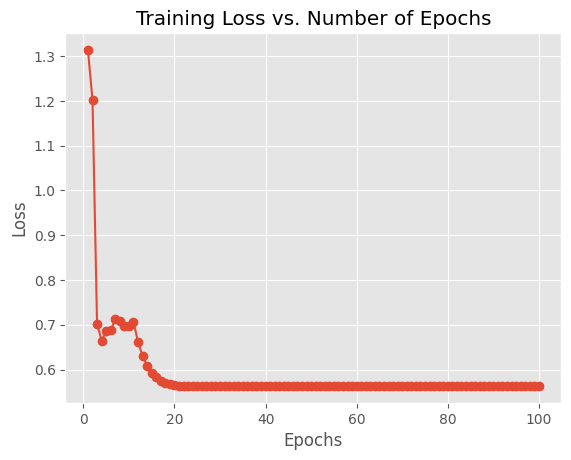

In [163]:
plot_loss(nn_model.cost_)

In [164]:
predictions = nn_model.predict(X_train_np)
accuracy = accuracy_score(y_train_np, predictions)
print(f'Training accuracy: {accuracy:.2f}')

Training accuracy: 0.25


25% accuracy is no better than random guessing with four classes... not sure what is going wrong here

### 2c. Second Model

In [28]:
scaler = StandardScaler()
scaler.fit(X_train_np)
X_train_normalized_np = scaler.transform(X_train_np)

In [166]:
nn_model.fit(X_train_normalized_np, y_train_np, print_progress=10)

Epoch: 100/100

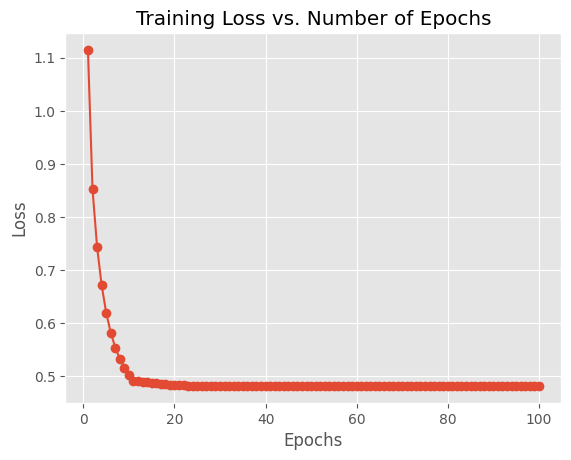

In [167]:
plot_loss(nn_model.cost_)

In [168]:
predictions = nn_model.predict(X_train_normalized_np)
accuracy = accuracy_score(y_train_np, predictions)
print(f'Training accuracy: {accuracy:.2f}')

Training accuracy: 0.52


### 2d. Third Model

This is likely due to my own ignorance, but isn't it that there are no categorical columns in this dataset?... except for the one we made for the target (ChildPoverty)?

### 2e. Discuss Results

As I explained above, I am not sure why my first model had a training accuracy no better than random guess for the four classes (exactly 25%). However, the second model (with continuous data normalized via StandardScaler) had a training accuracy of 52% -- not exceptional, but at least better than random guessing.

Also, the second model had a much easier time in the earlier epochs reducing loss smoothly, whereas the first model without normalized continuous data had some trouble before epoch 20.

## 3. Modeling

### 3a. Three Layer

In [23]:
class ThreeLayerPerceptron(TwoLayerPerceptronBase):
    def __init__(self, n_hidden1=30, n_hidden2=30,
                 C=0.0, epochs=500, eta=0.001, random_state=None):
        super(ThreeLayerPerceptron, self).__init__(
            n_hidden=n_hidden1,
            C=C, epochs=epochs, eta=eta, random_state=random_state
        )
        self.n_hidden2 = n_hidden2

    def _initialize_weights(self):
        """Initialize weights with small random numbers."""
        W1_num_elems = (self.n_features_)*self.n_hidden
        W1 = np.random.uniform(-1.0, 1.0, size=W1_num_elems).reshape(self.n_hidden, self.n_features_)
        b1 = np.zeros((self.n_hidden, 1))

        W2_num_elems = (self.n_hidden)*self.n_hidden2
        W2 = np.random.uniform(-1.0, 1.0, size=W2_num_elems).reshape(self.n_hidden2, self.n_hidden)
        b2 = np.zeros((self.n_hidden2, 1))

        W3_num_elems = (self.n_hidden2)*self.n_output_
        W3 = np.random.uniform(-1.0, 1.0, size=W3_num_elems).reshape(self.n_output_, self.n_hidden2)
        b3 = np.zeros((self.n_output_, 1))

        return W1, W2, W3, b1, b2, b3  

    def _feedforward(self, X, W1, W2, W3, b1, b2, b3):
        """Compute feedforward step"""
        A1 = X.T
        Z1 = np.dot(W1, A1) + b1
        A2 = self._sigmoid(Z1)

        Z2 = np.dot(W2, A2) + b2 
        A3 = self._sigmoid(Z2)  

        Z3 = np.dot(W3, A3) + b3  
        A4 = self._sigmoid(Z3)  

        return A1, Z1, A2, Z2, A3, Z3, A4  

    def _get_gradient(self, A1, A2, A3, A4, Z1, Z2, Z3, Y_enc, W1, W2, W3):
        """Compute gradient step using backpropagation."""
        V3 = -2*(Y_enc-A4)*A4*(1-A4)
        V2 = A3*(1-A3)*(W3.T @ V3)
        V1 = A2*(1-A2)*(W2.T @ V2)

        gradW3 = V3 @ A3.T
        gradW2 = V2 @ A2.T
        gradW1 = V1 @ A1.T

        gradb3 = np.sum(V3, axis=1, keepdims=True)
        gradb2 = np.sum(V2, axis=1, keepdims=True)
        gradb1 = np.sum(V1, axis=1, keepdims=True)

        gradW1 += W1 * self.l2_C
        gradW2 += W2 * self.l2_C
        gradW3 += W3 * self.l2_C

        return gradW1, gradW2, gradW3, gradb1, gradb2, gradb3  

    def predict(self, X):
        """Predict class labels"""
        _, _, _, _, _, _, A4 = self._feedforward(X, self.W1, self.W2, self.W3, self.b1, self.b2, self.b3)
        y_pred = np.argmax(A4, axis=0)
        return y_pred
    
    def fit(self, X, y, print_progress=False):
        """ Learn weights from training data."""

        self.n_features_ = X.shape[1]
        self.n_output_ = np.unique(y).shape[0]
        self.W1, self.W2, self.W3, self.b1, self.b2, self.b3 = self._initialize_weights()

        Y_enc = self._encode_labels(y)
        self.cost_ = []

        
        for i in range(self.epochs):
            if print_progress and (i+1) % print_progress == 0:
                print(f"Epoch: {i+1}/{self.epochs}")

            A1, Z1, A2, Z2, A3, Z3, A4 = self._feedforward(X, self.W1, self.W2, self.W3, self.b1, self.b2, self.b3)
            cost = self._cost(A4, Y_enc, self.W1, self.W2)
            self.cost_.append(cost)

            gradW1, gradW2, gradW3, gradb1, gradb2, gradb3 = self._get_gradient(A1=A1, A2=A2, A3=A3, A4=A4, Z1=Z1, Z2=Z2, Z3=Z3, Y_enc=Y_enc, W1=self.W1, W2=self.W2, W3=self.W3)

            self.W1 -= self.eta * gradW1
            self.W2 -= self.eta * gradW2
            self.W3 -= self.eta * gradW3
            self.b1 -= self.eta * gradb1
            self.b2 -= self.eta * gradb2
            self.b3 -= self.eta * gradb3

        return self

In [198]:
params = {
    "n_hidden1": 50,
    "n_hidden2": 50,
    "C": 0.0,
    "epochs": 100,
    "eta": 0.00001,
    "random_state": 1
}

nn_model = ThreeLayerPerceptron(**params)

In [199]:
nn_model.fit(X_train_normalized_np, y_train_np, print_progress=10)

'Epoch: 100/100'

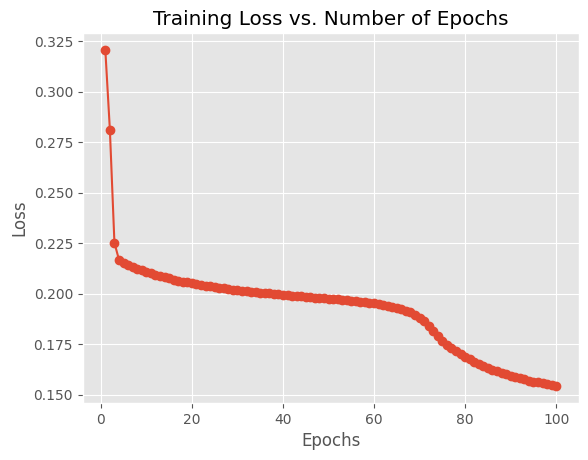

In [200]:
plot_loss(nn_model.cost_)

In [201]:
predictions = nn_model.predict(X_train_normalized_np)
accuracy = accuracy_score(y_train_np, predictions)
print(f'Training accuracy: {accuracy:.2f}')

Training accuracy: 0.55


### 3b. Four Layer

In [37]:
class FourLayerPerceptron(TwoLayerPerceptronBase):
    def __init__(self, n_hidden1=30, n_hidden2=30, n_hidden3=30,
                 C=0.0, epochs=500, eta=0.001, random_state=None):
        super().__init__(C=C, epochs=epochs, eta=eta, random_state=random_state)
        self.C = C
        self.n_hidden1 = n_hidden1
        self.n_hidden2 = n_hidden2
        self.n_hidden3 = n_hidden3

    def _initialize_weights(self):
        """Initialize weights with small random numbers for four layers."""
        W1_num_elems = self.n_features_ * self.n_hidden
        W1 = np.random.uniform(-1.0, 1.0, size=W1_num_elems)
        W1 = W1.reshape(self.n_hidden, self.n_features_)  # reshape to be W
        b1 = np.zeros((self.n_hidden, 1))

        W2_num_elems = self.n_hidden * self.n_hidden2
        W2 = np.random.uniform(-1.0, 1.0, size=W2_num_elems)
        W2 = W2.reshape(self.n_hidden2, self.n_hidden)
        b2 = np.zeros((self.n_hidden2, 1))

        W3_num_elems = self.n_hidden2 * self.n_hidden3
        W3 = np.random.uniform(-1.0, 1.0, size=W3_num_elems)
        W3 = W3.reshape(self.n_hidden3, self.n_hidden2)
        b3 = np.zeros((self.n_hidden3, 1))

        W4_num_elems = self.n_hidden3 * self.n_output_
        W4 = np.random.uniform(-1.0, 1.0, size=W4_num_elems)
        W4 = W4.reshape(self.n_output_, self.n_hidden3)
        b4 = np.zeros((self.n_output_, 1))

        return W1, W2, W3, W4, b1, b2, b3, b4

    def _feedforward(self, X, W1, W2, W3, W4, b1, b2, b3, b4):
        """Compute feedforward step for four layers."""
        A1 = X.T
        Z1 = np.dot(W1, A1) + b1
        A2 = self._sigmoid(Z1)

        Z2 = np.dot(W2, A2) + b2
        A3 = self._sigmoid(Z2)

        Z3 = np.dot(W3, A3) + b3
        A4 = self._sigmoid(Z3)

        Z4 = np.dot(W4, A4) + b4
        A5 = self._sigmoid(Z4)

        return A1, Z1, A2, Z2, A3, Z3, A4, Z4, A5

    def _get_gradient(self, A1, A2, A3, A4, A5, Z1, Z2, Z3, Z4, Y_enc, W1, W2, W3, W4):
        """Compute gradient step using backpropagation for four layers."""
        V4 = -2 * (Y_enc - A5) * A5 * (1 - A5)
        V3 = A4 * (1 - A4) * (W4.T @ V4)
        V2 = A3 * (1 - A3) * (W3.T @ V3)
        V1 = A2 * (1 - A2) * (W2.T @ V2)

        gradW4 = V4 @ A4.T
        gradW3 = V3 @ A3.T
        gradW2 = V2 @ A2.T
        gradW1 = V1 @ A1.T

        gradb4 = np.sum(V4, axis=1).reshape((-1, 1))
        gradb3 = np.sum(V3, axis=1).reshape((-1, 1))
        gradb2 = np.sum(V2, axis=1).reshape((-1, 1))
        gradb1 = np.sum(V1, axis=1).reshape((-1, 1))

        gradW4 += W4 * self.l2_C
        gradW3 += W3 * self.l2_C
        gradW2 += W2 * self.l2_C
        gradW1 += W1 * self.l2_C

        return gradW1, gradW2, gradW3, gradW4, gradb1, gradb2, gradb3, gradb4

    def predict(self, X):
        """Predict class labels"""
        _, _, _, _, _, _, _, _, A5 = self._feedforward(X, self.W1, self.W2, self.W3, self.W4, self.b1, self.b2, self.b3, self.b4)
        y_pred = np.argmax(A5, axis=0)
        return y_pred

    def fit(self, X, y, print_progress=False):
        """Learn weights from training data with four layers."""
        self.n_features_ = X.shape[1]
        self.n_output_ = np.unique(y).shape[0]  
        self.W1, self.W2, self.W3, self.W4, self.b1, self.b2, self.b3, self.b4 = self._initialize_weights()

        Y_enc = self._encode_labels(y)  
        self.cost_ = []

        for i in range(self.epochs):  
            if print_progress and (i + 1) % print_progress == 0:
                print(f"Epoch: {i + 1}/{self.epochs}")

            A1, Z1, A2, Z2, A3, Z3, A4, Z4, A5 = self._feedforward(X, self.W1, self.W2, self.W3, self.W4, self.b1, self.b2, self.b3, self.b4)

            cost = self._cost(A5, Y_enc, self.W1, self.W2, self.W3, self.W4)
            self.cost_.append(cost)

            gradW1, gradW2, gradW3, gradW4, gradb1, gradb2, gradb3, gradb4 = self._get_gradient(
                A1=A1, A2=A2, A3=A3, A4=A4, A5=A5,
                Z1=Z1, Z2=Z2, Z3=Z3, Z4=Z4,
                Y_enc=Y_enc, W1=self.W1, W2=self.W2, W3=self.W3, W4=self.W4)

            self.W1 -= self.eta * gradW1
            self.W2 -= self.eta * gradW2
            self.W3 -= self.eta * gradW3
            self.W4 -= self.eta * gradW4
            self.b1 -= self.eta * gradb1
            self.b2 -= self.eta * gradb2
            self.b3 -= self.eta * gradb3
            self.b4 -= self.eta * gradb4

        return self
    
    def _cost(self, A5, Y_enc, W1, W2, W3, W4):
        """
        Calculate the cost function of the current state of the neural network.
        """
        # Calculate mean squared errors.
        cost = np.mean((Y_enc - A5)**2)
        L2_term = (self.C / 2.0) * (np.sum(W1 ** 2.0) + np.sum(W2 ** 2.0) + np.sum(W3 ** 2.0) + np.sum(W4 ** 2.0))
        
        cost = cost + L2_term
        return cost

In [38]:
params = {
    "n_hidden1": 50,
    "n_hidden2": 50,
    "n_hidden3": 50,
    "C": 0.0,
    "epochs": 100,
    "eta": 0.00001,
    "random_state": 1
}

nn_model = FourLayerPerceptron(**params)

In [39]:
nn_model.fit(X_train_normalized_np, y_train_np, print_progress=10)

Epoch: 10/100
Epoch: 20/100
Epoch: 30/100
Epoch: 40/100
Epoch: 50/100
Epoch: 60/100
Epoch: 70/100
Epoch: 80/100
Epoch: 90/100
Epoch: 100/100


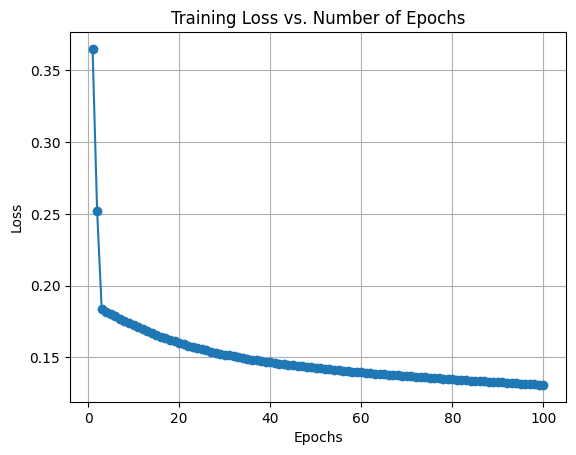

In [42]:
plot_loss(nn_model.cost_)

In [43]:
predictions = nn_model.predict(X_train_normalized_np)
accuracy = accuracy_score(y_train_np, predictions)
print(f'Training accuracy: {accuracy:.2f}')

Training accuracy: 0.61


Getting slightly better (but still not seeing great accuracy).

### 3c. Five Layer

I was having trouble understanding an error I was encountering as I made the below five layer perceptron, so I went to ChatGPT-4 for help. In this same conversation I asked it to help me implement a RMS prop implementation.
- https://chat.openai.com/share/18f4c71a-02f2-41cf-b4be-38dd8e348b81

A note on the previous lab ChatGPT conversations... I had deleted these conversations in my ChatGPT profile and did not realize that this would delete the offline link as well. Unfortunatley there is no way that I know of as to recovering these conversations. I take full responsibility for this mistake.

In [79]:
class FiveLayerPerceptron(TwoLayerPerceptronBase):
    def __init__(self, n_hidden1=30, n_hidden2=30, n_hidden3=30, n_hidden4=30,
                 C=0.0, epochs=500, eta=0.001, random_state=None):
        super().__init__(C=C, epochs=epochs, eta=eta, random_state=random_state)
        self.C = C
        self.n_hidden1 = n_hidden1
        self.n_hidden2 = n_hidden2
        self.n_hidden3 = n_hidden3
        self.n_hidden4 = n_hidden4

    def _initialize_weights(self):
        """Initialize weights with small random numbers for five layers."""
        W1_num_elems = self.n_features_ * self.n_hidden
        W1 = np.random.uniform(-1.0, 1.0, size=W1_num_elems)
        W1 = W1.reshape(self.n_hidden, self.n_features_)  # reshape to be W
        b1 = np.zeros((self.n_hidden, 1))

        W2_num_elems = self.n_hidden * self.n_hidden2
        W2 = np.random.uniform(-1.0, 1.0, size=W2_num_elems)
        W2 = W2.reshape(self.n_hidden2, self.n_hidden)
        b2 = np.zeros((self.n_hidden2, 1))

        W3_num_elems = self.n_hidden2 * self.n_hidden3
        W3 = np.random.uniform(-1.0, 1.0, size=W3_num_elems)
        W3 = W3.reshape(self.n_hidden3, self.n_hidden2)
        b3 = np.zeros((self.n_hidden3, 1))

        W4_num_elems = self.n_hidden3 * self.n_hidden4
        W4 = np.random.uniform(-1.0, 1.0, size=W4_num_elems)
        W4 = W4.reshape(self.n_hidden4, self.n_hidden3)
        b4 = np.zeros((self.n_hidden4, 1))

        W5_num_elems = self.n_hidden4 * self.n_output_
        W5 = np.random.uniform(-1.0, 1.0, size=W5_num_elems)
        W5 = W5.reshape(self.n_output_, self.n_hidden4)
        b5 = np.zeros((self.n_output_, 1))
        
        return W1, W2, W3, W4, W5, b1, b2, b3, b4, b5

    def _feedforward(self, X, W1, W2, W3, W4, W5, b1, b2, b3, b4, b5):
        """Compute feedforward step for five layers."""
        A1 = X.T
        Z1 = np.dot(W1, A1) + b1
        A2 = self._sigmoid(Z1)

        Z2 = np.dot(W2, A2) + b2
        A3 = self._sigmoid(Z2)

        Z3 = np.dot(W3, A3) + b3
        A4 = self._sigmoid(Z3)

        Z4 = np.dot(W4, A4) + b4
        A5 = self._sigmoid(Z4)
        
        Z5 = np.dot(W5, A5) + b5
        A6 = self._sigmoid(Z5)

        return A1, Z1, A2, Z2, A3, Z3, A4, Z4, A5, Z5, A6

    def _get_gradient(self, A1, A2, A3, A4, A5, A6, Z1, Z2, Z3, Z4, Z5, Y_enc, W1, W2, W3, W4, W5):
        """Compute gradient step using backpropagation for five layers."""
        V5 = -2 * (Y_enc - A6) * A6 * (1 - A6)
        V4 = A5 * (1 - A5) * (W5.T @ V5)
        V3 = A4 * (1 - A4) * (W4.T @ V4)
        V2 = A3 * (1 - A3) * (W3.T @ V3)
        V1 = A2 * (1 - A2) * (W2.T @ V2)

        gradW5 = V5 @ A5.T
        gradW4 = V4 @ A4.T
        gradW3 = V3 @ A3.T
        gradW2 = V2 @ A2.T
        gradW1 = V1 @ A1.T

        gradb5 = np.sum(V5, axis=1).reshape((-1, 1))
        gradb4 = np.sum(V4, axis=1).reshape((-1, 1))
        gradb3 = np.sum(V3, axis=1).reshape((-1, 1))
        gradb2 = np.sum(V2, axis=1).reshape((-1, 1))
        gradb1 = np.sum(V1, axis=1).reshape((-1, 1))

        gradW5 += W5 * self.l2_C
        gradW4 += W4 * self.l2_C
        gradW3 += W3 * self.l2_C
        gradW2 += W2 * self.l2_C
        gradW1 += W1 * self.l2_C

        return gradW1, gradW2, gradW3, gradW4, gradW5, gradb1, gradb2, gradb3, gradb4, gradb5

    def predict(self, X):
        """Predict class labels"""
        _, _, _, _, _, _, _, _, _, _, A6 = self._feedforward(X, self.W1, self.W2, self.W3, self.W4, self.W5, self.b1, self.b2, self.b3, self.b4, self.b5)
        y_pred = np.argmax(A6, axis=0)
        return y_pred

    def fit(self, X, y, print_progress=False):
        """Learn weights from training data with five layers."""
        self.n_features_ = X.shape[1]
        self.n_output_ = np.unique(y).shape[0]  
        self.W1, self.W2, self.W3, self.W4, self.W5, self.b1, self.b2, self.b3, self.b4, self.b5 = self._initialize_weights()

        Y_enc = self._encode_labels(y)  
        self.cost_ = []

        for i in range(self.epochs):  
            if print_progress and (i + 1) % print_progress == 0:
                print(f"Epoch: {i + 1}/{self.epochs}")

            A1, Z1, A2, Z2, A3, Z3, A4, Z4, A5, Z5, A6 = self._feedforward(X, self.W1, self.W2, self.W3, self.W4, self.W5, self.b1, self.b2, self.b3, self.b4, self.b5)

            cost = self._cost(A6, Y_enc, self.W1, self.W2, self.W3, self.W4, self.W5)
            self.cost_.append(cost)

            gradW1, gradW2, gradW3, gradW4, gradW5, gradb1, gradb2, gradb3, gradb4, gradb5 = self._get_gradient(
                A1=A1, A2=A2, A3=A3, A4=A4, A5=A5, A6=A6,
                Z1=Z1, Z2=Z2, Z3=Z3, Z4=Z4, Z5=Z5,
                Y_enc=Y_enc, W1=self.W1, W2=self.W2, W3=self.W3, W4=self.W4, W5=self.W5)

            self.W1 -= self.eta * gradW1
            self.W2 -= self.eta * gradW2
            self.W3 -= self.eta * gradW3
            self.W4 -= self.eta * gradW4
            self.W5 -= self.eta * gradW5
            self.b1 -= self.eta * gradb1
            self.b2 -= self.eta * gradb2
            self.b3 -= self.eta * gradb3
            self.b4 -= self.eta * gradb4
            self.b5 -= self.eta * gradb5

        return self
    
    def _cost(self, A6, Y_enc, W1, W2, W3, W4, W5):
        """
        Calculate the cost function of the current state of the neural network.
        """
        # Calculate mean squared errors.
        cost = np.mean((Y_enc - A6)**2)
        L2_term = (self.C / 2.0) * (np.sum(W1 ** 2.0) + np.sum(W2 ** 2.0) + np.sum(W3 ** 2.0) + np.sum(W4 ** 2.0) + np.sum(W5 ** 2.0))
        
        cost = cost + L2_term
        return cost

In [80]:
params = {
    "n_hidden1": 50,
    "n_hidden2": 50,
    "n_hidden3": 50,
    "n_hidden4": 50,
    "C": 0.0,
    "epochs": 100,
    "eta": 0.00001,
    "random_state": 1
}

nn_model = FiveLayerPerceptron(**params)

In [81]:
nn_model.fit(X_train_normalized_np, y_train_np, print_progress=10)

Epoch: 10/100
Epoch: 20/100
Epoch: 30/100
Epoch: 40/100
Epoch: 50/100
Epoch: 60/100
Epoch: 70/100
Epoch: 80/100
Epoch: 90/100
Epoch: 100/100


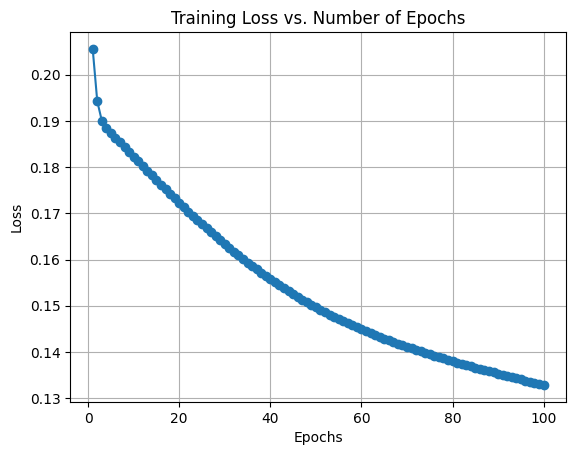

In [82]:
plot_loss(nn_model.cost_)

In [83]:
predictions = nn_model.predict(X_train_normalized_np)
accuracy = accuracy_score(y_train_np, predictions)
print(f'Training accuracy: {accuracy:.2f}')

Training accuracy: 0.59


### 3d. Adaptive Learning Technique (Root Mean Square Propogation)

In [102]:
class RMSPropOptimizer(FiveLayerPerceptron):
    def __init__(self, n_hidden1=30, n_hidden2=30, n_hidden3=30, n_hidden4=30, 
                 C=0.0, epochs=100, eta=0.001, rho=0.9, epsilon=1e-8, random_state=None):
        super().__init__(n_hidden1=n_hidden1, n_hidden2=n_hidden2, n_hidden3=n_hidden3, n_hidden4=n_hidden4,
                         C=C, epochs=epochs, eta=eta, random_state=random_state)
        self.rho = rho
        self.epsilon = epsilon

    def fit(self, X, y, print_progress=False):
        """Override the fit method to include RMSprop initialization."""
        
        # Correcting the method call
        self.n_features_ = X.shape[1]
        self.n_output_ = np.unique(y).shape[0]  
        self.W1, self.W2, self.W3, self.W4, self.W5, self.b1, self.b2, self.b3, self.b4, self.b5 = self._initialize_weights()

        # Initialize RMSprop cache
        self.EgW1, self.EgW2, self.EgW3, self.EgW4, self.EgW5 = [np.zeros_like(w) for w in (self.W1, self.W2, self.W3, self.W4, self.W5)]
        self.Egb1, self.Egb2, self.Egb3, self.Egb4, self.Egb5 = [np.zeros_like(b) for b in (self.b1, self.b2, self.b3, self.b4, self.b5)]

        Y_enc = self._encode_labels(y)  
        self.cost_ = []

        # Run the training epochs
        for i in range(self.epochs):
            # ... [Rest of the training loop, including backpropagation to get the gradients] ...

            # Now we delegate to a new method to handle the RMSprop update
            self._train_with_rmsprop(gradW1, gradW2, gradW3, gradW4, gradW5, gradb1, gradb2, gradb3, gradb4, gradb5)

        return self

    def _train_with_rmsprop(self, gradW1, gradW2, gradW3, gradW4, gradW5, gradb1, gradb2, gradb3, gradb4, gradb5):
        """Apply RMSprop to update the weights and biases."""
        
        # Update RMSprop cache; decay old average and incorporate new gradient
        self.EgW1 = self.rho * self.EgW1 + (1 - self.rho) * gradW1**2
        self.EgW2 = self.rho * self.EgW2 + (1 - self.rho) * gradW2**2
        self.EgW3 = self.rho * self.EgW3 + (1 - self.rho) * gradW3**2
        self.EgW4 = self.rho * self.EgW4 + (1 - self.rho) * gradW4**2
        self.EgW5 = self.rho * self.EgW5 + (1 - self.rho) * gradW5**2

        self.Egb1 = self.rho * self.Egb1 + (1 - self.rho) * gradb1**2
        self.Egb2 = self.rho * self.Egb2 + (1 - self.rho) * gradb2**2
        self.Egb3 = self.rho * self.Egb3 + (1 - self.rho) * gradb3**2
        self.Egb4 = self.rho * self.Egb4 + (1 - self.rho) * gradb4**2
        self.Egb5 = self.rho * self.Egb5 + (1 - self.rho) * gradb5**2

        # Update the weights and biases with RMSprop
        self.W1 -= self.eta / (np.sqrt(self.EgW1) + self.epsilon) * gradW1
        self.W2 -= self.eta / (np.sqrt(self.EgW2) + self.epsilon) * gradW2
        self.W3 -= self.eta / (np.sqrt(self.EgW3) + self.epsilon) * gradW3
        self.W4 -= self.eta / (np.sqrt(self.EgW4) + self.epsilon) * gradW4
        self.W5 -= self.eta / (np.sqrt(self.EgW5) + self.epsilon) * gradW5

        self.b1 -= self.eta / (np.sqrt(self.Egb1) + self.epsilon) * gradb1
        self.b2 -= self.eta / (np.sqrt(self.Egb2) + self.epsilon) * gradb2
        self.b3 -= self.eta / (np.sqrt(self.Egb3) + self.epsilon) * gradb3
        self.b4 -= self.eta / (np.sqrt(self.Egb4) + self.epsilon) * gradb4
        self.b5 -= self.eta / (np.sqrt(self.Egb5) + self.epsilon) * gradb5

In [103]:
params = {
    "n_hidden1": 50,
    "n_hidden2": 50,
    "n_hidden3": 50,
    "n_hidden4": 50,
    "C": 0.0,
    "epochs": 100,
    "eta": 0.00001,
    "random_state": 1
}

nn_model = RMSPropOptimizer(**params)

In [104]:
nn_model.fit(X_train_normalized_np, y_train_np, print_progress=10)

NameError: name 'gradW1' is not defined

At this point I ran out of time to finish debugging and implementing the RMSprop class.